In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import  fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
dataset = fetch_california_housing()
data = dataset['data']


In [4]:
x = data
y = dataset['target']
feature_names = dataset['feature_names']

In [5]:

print(x.shape)

(20640, 8)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [8]:
w = []
r2 = []
alpha_list = [0, 0.1, 0.5, 2]

for alpha in alpha_list:
    # fit model
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)

    # prediction
    y_pred = model.predict(x_test)

    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    w.append(model.coef_.tolist())

In [10]:
print(model.coef_)

[ 4.40893376e-01  9.37439078e-03 -1.18819721e-01  7.70630990e-01
 -8.15303327e-07 -4.71917796e-03 -4.24359941e-01 -4.39082563e-01]


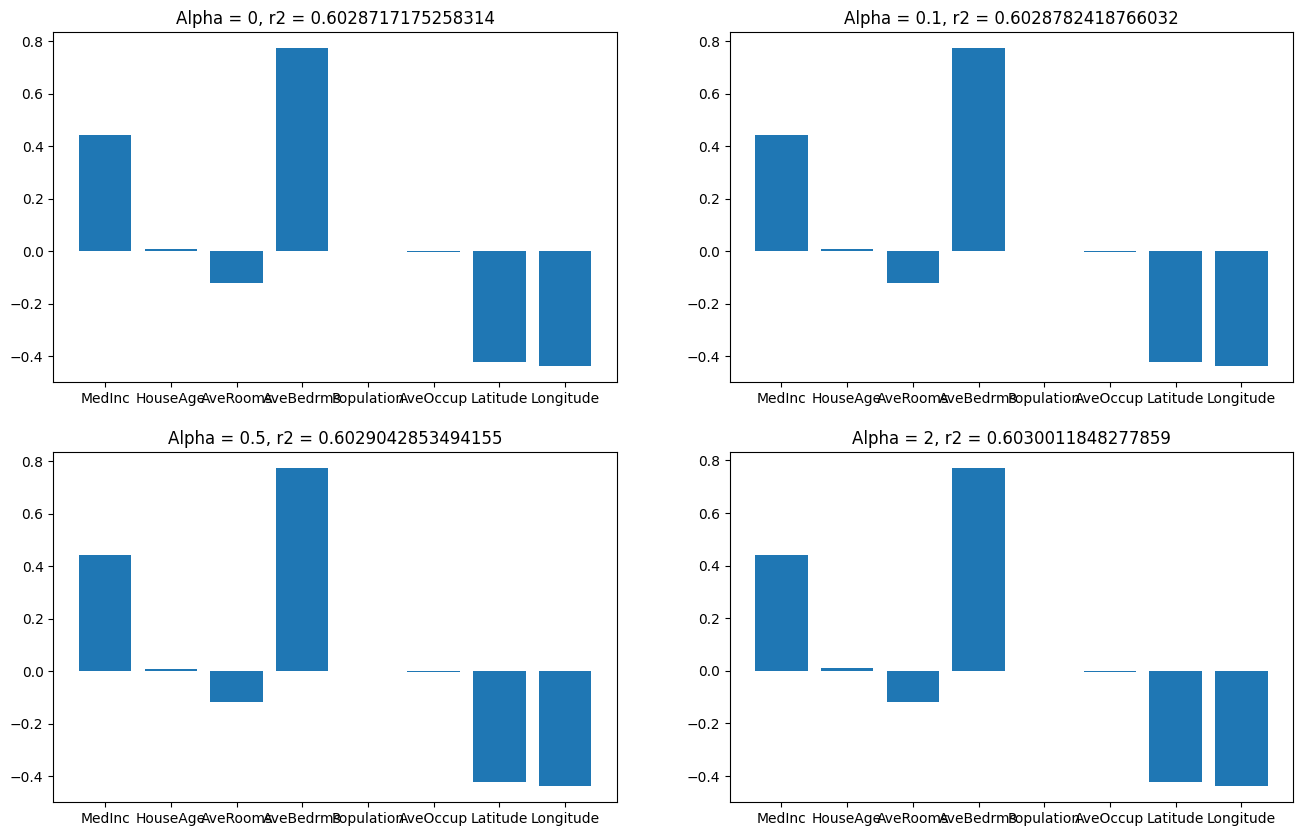

In [9]:
# Visualise Feature Selection

plt.figure(figsize=(16, 10))

for i in range(len(alpha_list)):
  plt.subplot(2, 2, i+1)
  plt.bar(feature_names, w[i])
  plt.title('Alpha = {}, r2 = {}'.format(alpha_list[i], r2[i]))

plt.show()